<a href="https://colab.research.google.com/github/marcosinovamp/Aulasprepwork/blob/master/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install scrapy
!pip install selenium
!pip install bs4
import numpy as np
import pandas as pd
import scrapy
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.formatter.use_locale'] = True


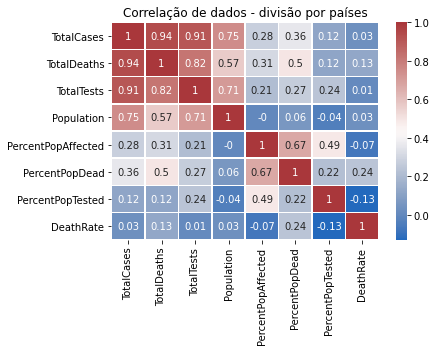

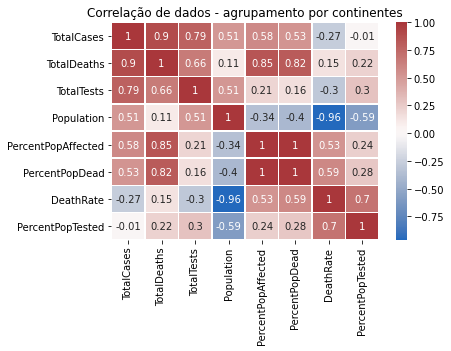

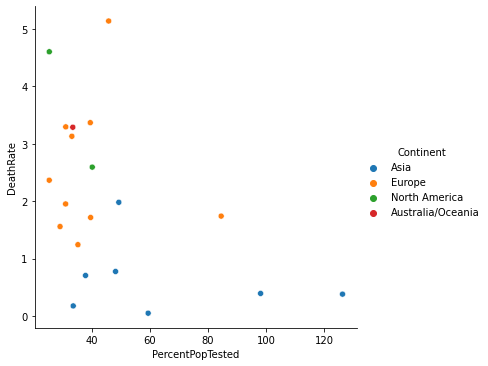

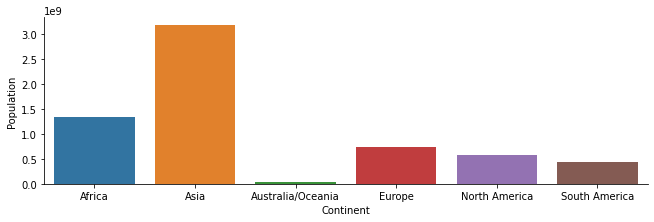

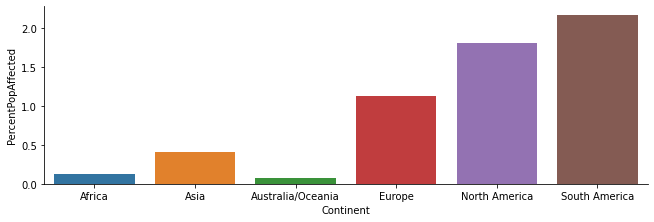

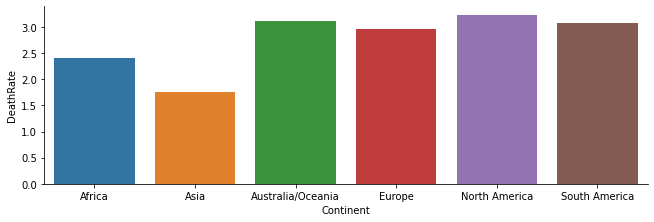

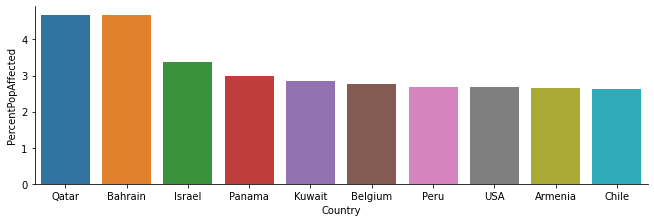

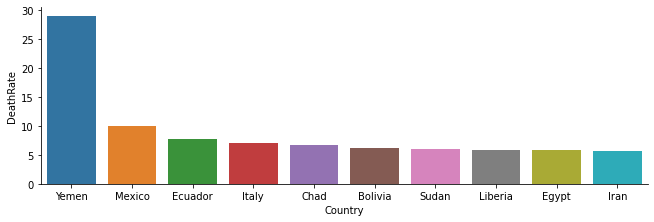

In [5]:
page = requests.get('https://www.worldometers.info/coronavirus/')
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', id='main_table_countries_today')
temp = table.find_all('th')
thead = []
for t in temp:
    thead.append(t.get_text())
del thead[18]
del thead[-1]
temp2 = table.find_all('tr', class_="")
del temp2[0]
tbody = []
for i in temp2:
    tbody.append(i.get_text().split('\n'))
for t in tbody:
    del t[0]
    del t[-1]
covid = pd.DataFrame(tbody, columns=thead)
covid = covid.drop([216], axis=0)
del covid['#']
covid = covid.rename(columns={'Country,Other': 'Country'})
covid['TotalCases'] = covid['TotalCases'].str.replace(",","").str.replace(r'^\s*$', '0', regex=True).str.replace('N/A', '0').astype(int)
covid['NewCases'] = covid['NewCases'].str.replace(",","").str.replace(r'^\s*$', '0', regex=True).str.replace('N/A', '0').astype(int)
covid['TotalDeaths'] = covid['TotalDeaths'].str.replace(",","").str.replace(r'^\s*$', '0', regex=True).str.replace('N/A', '0').astype(int)
covid['NewDeaths'] = covid['NewDeaths'].str.replace(",","").str.replace(r'^\s*$', '0', regex=True).str.replace('N/A', '0').astype(int)
covid['TotalRecovered'] = covid['TotalRecovered'].str.replace(",","").str.replace(r'^\s*$', '0', regex=True).str.replace('N/A', '0').astype(int)
covid['NewRecovered'] = covid['NewRecovered'].str.replace(",","").str.replace(r'^\s*$', '0', regex=True).str.replace('N/A', '0').astype(int)
covid['ActiveCases'] = covid['ActiveCases'].str.replace(",","").str.replace(r'^\s*$', '0', regex=True).str.replace('N/A', '0').astype(int)
covid['Serious,Critical'] = covid['Serious,Critical'].str.replace(",","").str.replace(r'^\s*$', '0', regex=True).str.replace('N/A', '0').astype(int)
covid['TotalTests'] = covid['TotalTests'].str.replace(",","").str.replace(r'^\s*$', '0', regex=True).str.replace('N/A', '0').astype(int)
covid['Population'] = covid['Population'].str.replace(",","").str.replace(r'^\s*$', '0', regex=True).str.replace('N/A', '0').astype(int)
covid = covid[(covid.Population >= 1000000)]
covid = covid[['Country', 'Continent', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'TotalTests', 'Population']]
covid.head(20).style
covid['PercentPopAffected'] = covid['TotalCases']*100/covid['Population']
covid['PercentPopDead'] = covid['TotalDeaths']*100/covid['Population']
covid['DeathRate'] = covid['TotalDeaths']*100/covid['TotalCases']
covid['PercentPopTested'] = covid['TotalTests']*100/covid['Population']
covidcorr = covid[['Country', 'Continent', 'TotalCases', 'TotalDeaths', 'TotalTests', 'Population', 'PercentPopAffected', 'PercentPopDead', 'PercentPopTested', 'DeathRate']]
round(covidcorr.head(10), 2).style
continentcov = covid[['Continent', 'TotalCases', 'TotalDeaths', 'TotalTests', 'Population']].groupby('Continent').sum()
continentcov['PercentPopAffected'] = continentcov['TotalCases']*100/continentcov['Population']
continentcov['PercentPopDead'] = continentcov['TotalDeaths']*100/continentcov['Population']
continentcov['DeathRate'] = continentcov['TotalDeaths']*100/continentcov['TotalCases']
continentcov['PercentPopTested'] = continentcov['TotalTests']*100/continentcov['Population']
round(continentcov.sort_values(by="Population", ascending=False), 2).style
ax = plt.axes()
ax.set_title('Correlação de dados - divisão por países')
gcorr = sns.heatmap(round(covidcorr.corr(),2), annot=True, linewidths=.5, cmap="vlag", ax=ax)
plt.show()
sax = plt.axes()
sax.set_title('Correlação de dados - agrupamento por continentes')
gcorr2 = sns.heatmap(round(continentcov.corr(),2), annot=True, linewidths=.5, cmap="vlag", ax=sax)
plt.show()
graph = sns.relplot(x='PercentPopTested', y="DeathRate", hue="Continent", data=covid.sort_values(by='PercentPopTested', ascending=False).head(20))
recorte = pd.DataFrame(covid[['Country', 'PercentPopTested', 'DeathRate']].sort_values(by='PercentPopTested', ascending=False).reset_index().head(20))
del recorte['index']
round(recorte,2).style
companalysis = continentcov[['Population', 'PercentPopAffected', 'PercentPopDead', 'DeathRate']]
contpop = sns.catplot(x=companalysis.index, y="Population", ci=None,
            kind="bar", data=companalysis, height=3, aspect=3);
contpa = sns.catplot(x=companalysis.index, y="PercentPopAffected", ci=None,
            kind="bar", data=companalysis, height=3, aspect=3)
contdr = sns.catplot(x=companalysis.index, y="DeathRate", ci=None,
            kind="bar", data=companalysis, height=3, aspect=3)
icompanalysis = covid[['Country', 'Population', 'PercentPopAffected', 'PercentPopDead', 'DeathRate']]
indpa = sns.catplot(x='Country', y="PercentPopAffected", ci=None,
            kind="bar", data=icompanalysis.sort_values(by='PercentPopAffected', ascending=False).head(10), height=3, aspect=3)
inddr = sns.catplot(x='Country', y="DeathRate", ci=None,
            kind="bar", data=icompanalysis.sort_values(by='DeathRate', ascending=False).head(10), height=3, aspect=3)

In [10]:
covidnew = covid[['Country', 'NewCases', 'NewDeaths','ActiveCases', 'TotalCases', 'TotalDeaths', 'Population']]
covidnew['NewDeathRate'] = covid['NewDeaths']/covid['NewCases']
covidnew['NewDeathRate'] = covidnew['NewDeathRate'].replace([np.inf, -np.inf], np.nan)
covidnew['Dailyper'] = covidnew['NewCases']/covidnew['TotalCases'].replace([np.inf, -np.inf], np.nan)
covidnew['GrowingTax'] = covidnew['NewCases']/covidnew['ActiveCases'].replace([np.inf, -np.inf], np.nan)
covidnew = covidnew.replace([np.inf, -np.inf], np.nan).sort_values(by='GrowingTax', ascending=False).reset_index()
del covidnew['index']
covidnew.style

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Country,NewCases,NewDeaths,ActiveCases,TotalCases,TotalDeaths,Population,NewDeathRate,Dailyper,GrowingTax
0,Switzerland,17440,7,57303,121093,2090,8674766,0.000401,0.144022,0.304347
1,UAE,1111,3,5004,126234,480,9928193,0.002700,0.008801,0.222022
2,Zambia,63,0,407,16200,348,18543101,0.000000,0.003889,0.154791
3,Papua New Guinea,5,0,35,588,7,9000110,0.000000,0.008503,0.142857
4,Malaysia,1240,7,9744,27805,236,32497011,0.005645,0.044596,0.127258
5,Uzbekistan,270,3,2283,65577,552,33622094,0.011111,0.004117,0.118265
6,Lithuania,766,2,6647,10949,136,2709882,0.002611,0.069961,0.115240
7,Austria,2456,13,23239,83267,992,9022788,0.005293,0.029495,0.105684
8,Georgia,1872,14,18718,30303,215,3986701,0.007479,0.061776,0.100011
9,Belarus,884,4,8998,93707,961,9448324,0.004525,0.009434,0.098244
